In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from PIL import Image

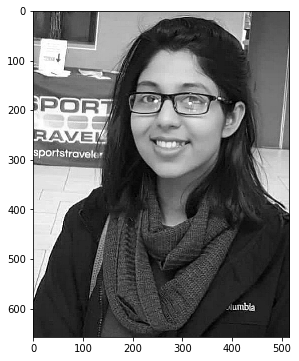

In [18]:
img = Image.open('input/tanu.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9,6))
plt.imshow(imggray);

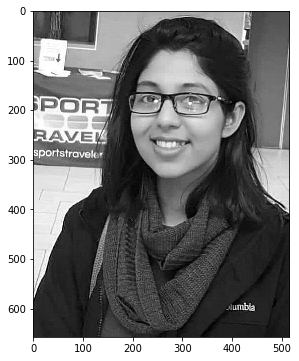

In [19]:
##converting the image data into numpy matrix
##plotting the result to show data is unchanged

imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');


In [20]:
##Computing SVD
U, sigma, V = np.linalg.svd(imgmat)

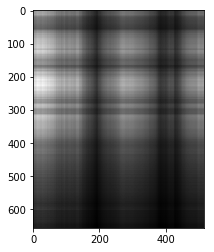

In [21]:
##approximation of image using 1st column of U and first row of V
#reproducing prominent feature of the image
#light area on the top and dark area on bottom
#darkness of arch causes extra darkness in the middle of the construction
#Each column of pixels different weighting of values , ,  u⃗1 :
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray');

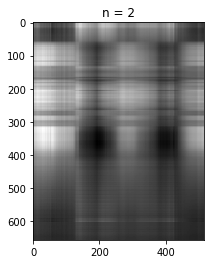

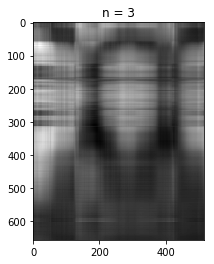

In [22]:
##2nd an 3rd vectors, the shape of arch begins to appear

for i in range(2, 4):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

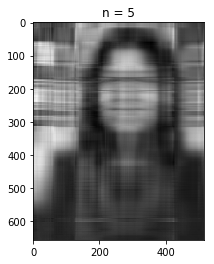

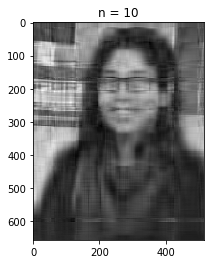

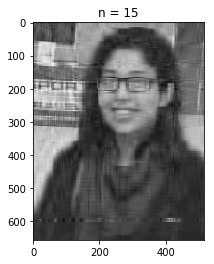

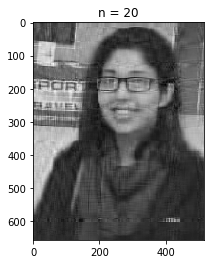

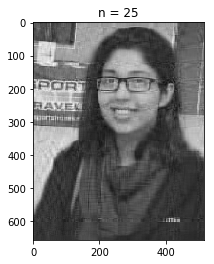

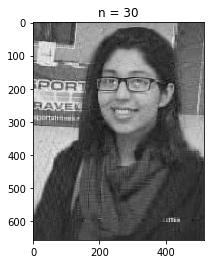

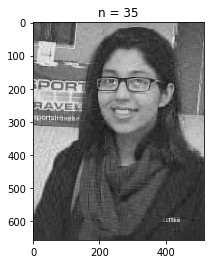

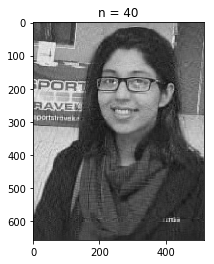

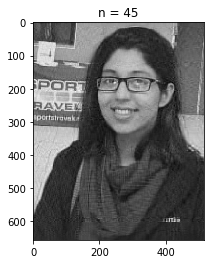

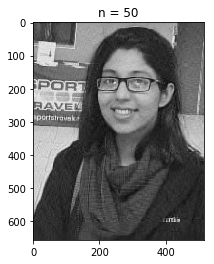

In [23]:
#loop: show the reconstructed image using 1st n vectors of SVD
#1st 50 vectors produce image very close to original
#while taking up only  50∗3900+50+50∗26003900∗2600≈3.2% 
#space as the original data.

for i in range(5, 51, 5):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()